# Hazard: Tropical cyclones

Tropical cyclones tracks are gathered in the class `TCTracks` and then provided to the hazard `TropCyclone` which computes the wind gusts at each centroid. `TropCyclone` inherits from `Hazard` and has an associated hazard type `TC`.

#### What do tropical cyclones look like in CLIMADA?

`TCTracks` reads and handles historical tropical cyclone tracks of the [IBTrACS](https://www.ncdc.noaa.gov/ibtracs/) repository or synthetic tropical cyclone tracks simulated using fully statistical or coupled statistical-dynamical modeling approaches. It also generates synthetic tracks from the historical ones using Wiener processes.

The tracks are stored in the attribute `data`, which is a list of `xarray`'s `Dataset` (see [xarray.Dataset](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html)). Each `Dataset` contains the following variables:

| Coordinates|
| :- |
| time |
| latitude |
| longitude |

| Descriptive variables |
| :- | 
| time_step |
| radius_max_wind |
| max_sustained_wind |
| central_pressure |
| environmental_pressure |

| Attributes|
| :- | 
| max_sustained_wind_unit |
| central_pressure_unit |
| sid |
| name |
| orig_event_flag |
| data_provider |
| basin |
| id_no |
| category |
<br>

### How is this tutorial structured?

[**Part 1: Load TC tracks**](#Part1)

<ol>

[**a) Load TC tracks from historical records**](#Part1.a)

[**b) Generate probabilistic events**](#Part1.b) 
    
[**c) ECMWF Forecast Tracks**](#Part1.c)    

[**d) Load TC tracks from other sources**](#Part1.d) 

</ol>

[**Part 2: `TropCyclone()` class**](#Part2) 

<ol>

[**a) Default hazard generation for tropical cyclones**](#Part2.a)

[**b) Implementing climate change**](#Part2.b)

[**c) Multiprocessing - improving performance for big computations**](#Part2.c)

[**d) Making videos**](#Part2.d)
    
</ol>

<a id='Part1'></a> 
## Part 1: Load TC tracks

Records of historical TCs are very limited and therefore the database to study this natural hazard remains sparse. Only a small fraction of the TCs make landfall every year and reliable documentation of past TC landfalling events has just started in the 1950s (1980s - satellite era). The generation of synthetic storm tracks is an important tool to overcome this spatial and temporal limitation. Synthetic dataset are much larger and thus allow to estimate the risk of much rarer events. Here we show the most prominent tools in CLIMADA to load TC tracks from historical records [a)](#Part1.a), generate a probabilistic dataset thereof [b)](#Part1.b), and work with model simulations [c)](#Part1.c).

<a id='Part1.a'></a> 
## a) Load TC tracks from historical records

The best-track historical data from the International Best Track Archive for Climate Stewardship ([IBTrACS](https://www.ncdc.noaa.gov/ibtracs/)) can easily be loaded into CLIMADA to study the historical records of TC events. The method `read_ibtracs_netcdf()` generates the `Datasets` for tracks selected by [IBTrACS](https://www.ncdc.noaa.gov/ibtracs/) id, or by basin and year range. To achieve this, it downloads the first time the [IBTrACS data v4 in netcdf format](ftp://eclipse.ncdc.noaa.gov/pub/ibtracs//v04r00/provisional/netcdf/IBTrACS.ALL.v04r00.nc) and stores it in `climada_python/data/system`. The tracks can be accessed later either using the attribute `data` or using `get_track()`, which allows to select tracks by its name or id. Use the method `append()` to extend the `data` list.

If you get an error downloading the IBTrACS data, try to manually access [ftp://eclipse.ncdc.noaa.gov/pub/ibtracs//v04r00/provisional/netcdf/](ftp://eclipse.ncdc.noaa.gov/pub/ibtracs//v04r00/provisional/netcdf/), connect as a *Guest* and copy the file `IBTrACS.ALL.v04r00.nc` to `climada_python/data/system`.

To visualize the tracks use `plot()`.


2020-10-22 10:41:55,514 - climada - DEBUG - Loading default config file: /Users/simonameiler/Documents/WCR/CLIMADA_develop/climada_python/climada/conf/defaults.conf


/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


2020-10-22 10:41:59,360 - climada.hazard.tc_tracks - WARNING - No valid wind/pressure values found for 1993178N14265, 1993221N12216, 1993223N07185, 1993246N16129, 1993263N11168, 1993271N14134, 1993285N12192, 1993285N16239, 1994128N04155, 1994212N11240, 1994221N15215, 1994224N16240, 1994249N11200, 1994272N40159, 1994273N08176, 1994291N12170, 1994294N13203, 1994295N25188, 1994348N04175.
2020-10-22 10:41:59,476 - climada.hazard.tc_tracks - INFO - Progress: 11%
2020-10-22 10:41:59,568 - climada.hazard.tc_tracks - INFO - Progress: 23%
2020-10-22 10:41:59,660 - climada.hazard.tc_tracks - INFO - Progress: 35%
2020-10-22 10:41:59,751 - climada.hazard.tc_tracks - INFO - Progress: 47%
2020-10-22 10:41:59,842 - climada.hazard.tc_tracks - INFO - Progress: 58%
2020-10-22 10:41:59,948 - climada.hazard.tc_tracks - INFO - Progress: 70%
2020-10-22 10:42:00,089 - climada.hazard.tc_tracks - INFO - Progress: 82%
2020-10-22 10:42:00,195 - climada.hazard.tc_tracks - INFO - Progress: 94%
Number of tracks: 34

/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_righ

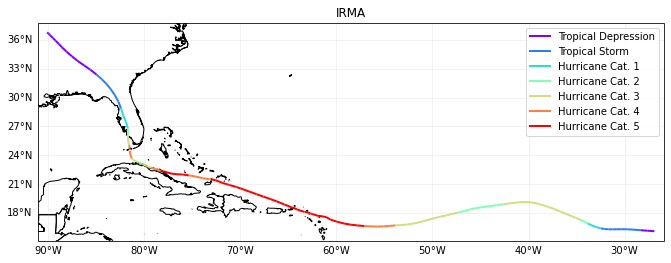

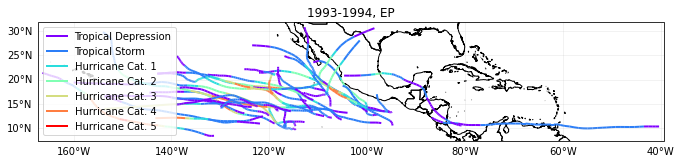

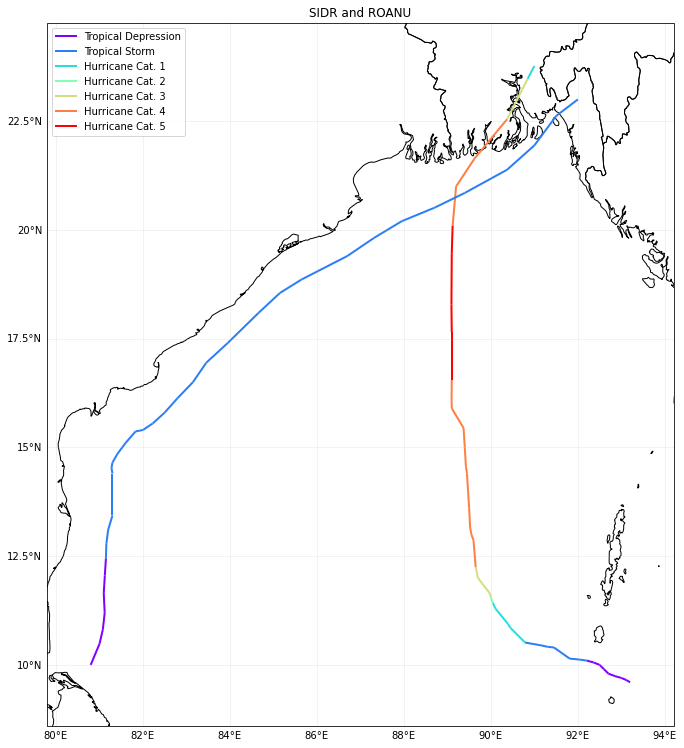

In [1]:
%matplotlib inline
from climada.hazard import TCTracks

tr_irma = TCTracks()
tr_irma.read_ibtracs_netcdf(provider='usa', storm_id='2017242N16333') # IRMA 2017
ax = tr_irma.plot()
ax.set_title('IRMA') # set title

# other ibtracs selection options
from climada.hazard import TCTracks
sel_ibtracs = TCTracks()
# years 1993 and 1994 in basin EP. 
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well
sel_ibtracs.read_ibtracs_netcdf(provider='usa', year_range=(1993, 1994), basin='EP', correct_pres=False)
print('Number of tracks:', sel_ibtracs.size)
ax = sel_ibtracs.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('1993-1994, EP') # set title

track1 = TCTracks()
track1.read_ibtracs_netcdf(provider='usa', storm_id='2007314N10093') # SIDR 2007
track2 = TCTracks()
track2.read_ibtracs_netcdf(provider='usa', storm_id='2016138N10081') # ROANU 2016
track1.append(track2.data) # put both tracks together
ax = track1.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('SIDR and ROANU'); # set title

In [2]:
tr_irma.get_track('2017242N16333')

<xarray.Dataset>
Dimensions:                 (time: 123)
Coordinates:
  * time                    (time) datetime64[ns] 2017-08-30 ... 2017-09-13T12:00:00
    lat                     (time) float32 16.1 16.147842 ... 36.495224 36.8
    lon                     (time) float32 -26.9 -27.592503 ... -90.100006
Data variables:
    time_step               (time) float64 1.08e+04 1.08e+04 ... 1.08e+04
    radius_max_wind         (time) float32 60.0 60.0 60.0 ... 60.0 60.0 60.0
    radius_oci              (time) float32 180.0 180.0 180.0 ... 350.0 350.0
    max_sustained_wind      (time) float32 30.0 32.0 35.0 ... 15.0 15.0 15.0
    central_pressure        (time) float32 1008.0 1007.0 ... 1004.0 1005.0
    environmental_pressure  (time) float64 1.012e+03 1.012e+03 ... 1.008e+03
Attributes:
    max_sustained_wind_unit:  kn
    central_pressure_unit:    mb
    name:                     IRMA
    sid:                      2017242N16333
    orig_event_flag:          True
    data_provider:          

<a id='Part1.b'></a> 
## b) Generate probabilistic events

Once tracks are present in `TCTracks`, one can generate synthetic tracks for each present track using `calc_random_walk()` and interpolate all the tracks to the same timestep using `equal_timestep()`.

`calc_random_walk()` generates random tracks within a configurable angle of variation. The wind intensities are decayed after landfall following an exponential decay. The decay coefficients are computed for each category (Saffir-Simpson scale) of the historical events and applied to the corresponding synthetic tracks.

2020-10-22 10:43:06,521 - climada.hazard.tc_tracks_synth - INFO - Computing 5 synthetic tracks.


/Users/simonameiler/Documents/WCR/CLIMADA_develop/climada_python/climada/hazard/tc_tracks_synth.py:128: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "_one_rnd_walk" failed type inference due to: non-precise type pyobject
During: typing of argument at /Users/simonameiler/Documents/WCR/CLIMADA_develop/climada_python/climada/hazard/tc_tracks_synth.py (138)

File "../../climada/hazard/tc_tracks_synth.py", line 138:
def _one_rnd_walk(track, ens_size, ens_amp0, ens_amp, max_angle, rnd_vec):
    <source elided>
    """
    ens_track = list()
    ^

  @jit(parallel=True)
/Users/simonameiler/Documents/WCR/CLIMADA_develop/climada_python/climada/hazard/tc_tracks_synth.py:128: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "_one_rnd_walk" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "../../climada/hazard/tc_tracks_synth.py",

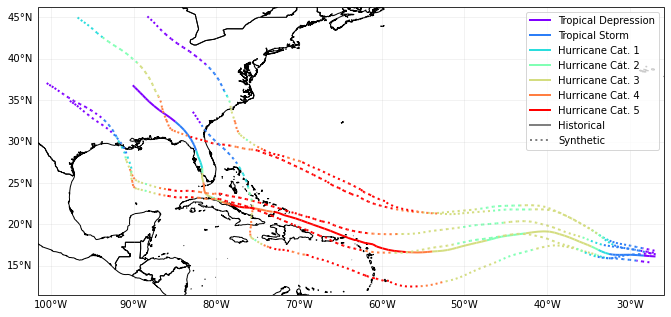

In [3]:
# select number of synthetic tracks to generate per present tracks. 
# see more configutration options (e.g. opening angle)
tr_irma.calc_random_walk(ens_size=5)
tr_irma.plot()

In [4]:
tr_irma.data[-1] # last synthetic track. notice the value of orig_event_flag and name

<xarray.Dataset>
Dimensions:                 (time: 123)
Coordinates:
  * time                    (time) datetime64[ns] 2017-08-30 ... 2017-09-13T12:00:00
    lat                     (time) float64 15.39 15.49 15.6 ... 34.59 34.79 35.0
    lon                     (time) float64 -27.64 -28.42 ... -97.51 -97.84
Data variables:
    radius_max_wind         (time) float64 60.0 60.0 60.0 ... 60.0 60.0 60.0
    max_sustained_wind      (time) float64 30.0 32.0 35.0 ... 12.01 11.31 10.58
    central_pressure        (time) float64 1.008e+03 1.007e+03 ... 999.2 999.8
    environmental_pressure  (time) float64 1.012e+03 1.012e+03 ... 1.008e+03
    time_step               (time) float64 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
    on_land                 (time) bool False False False ... True True True
    dist_since_lf           (time) float64 nan nan nan nan ... 804.3 838.2 875.9
Attributes:
    max_sustained_wind_unit:  kn
    central_pressure_unit:    mb
    name:                     IRMA_gen5
    s

2020-10-22 11:00:29,546 - climada.hazard.tc_tracks - INFO - Interpolating 6 tracks to 1h time steps.


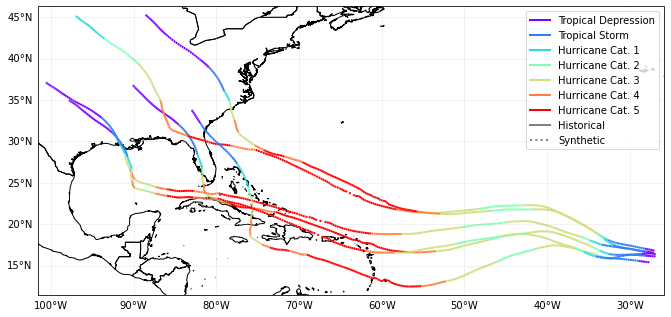

In [7]:
tr_irma.equal_timestep(time_step_h=1) # interpolate properties to 1 hour time step
tr_irma.plot()

### EXERCISE

Using the first synthetic track generated,

1. Which is the time frequency of the data?
2. Compute the maximum sustained wind for each day.

In [6]:
# Put your code here





In [4]:
# SOLUTION:
import numpy as np
# select the track
tc_syn = tr_irma.get_track('2017242N16333_gen1')

# 1. Which is the time frequency of the data?
# The values of a DataArray are numpy.arrays. 
# The nummpy.ediff1d computes the different between elements in an array
diff_time_ns = np.ediff1d(tc_syn.time)
diff_time_h = diff_time_ns.astype(int)/1000/1000/1000/60/60
print('Mean time frequency in hours:', diff_time_h.mean())
print('Std time frequency in hours:', diff_time_h.std())
print()

# 2. Compute the maximum sustained wind for each day.
print('Daily max sustained wind:', tc_syn.max_sustained_wind.groupby('time.day').max())

Mean time frequency in hours: 2.8524590163934427
Std time frequency in hours: 0.4925199695966566

Daily max sustained wind: <xarray.DataArray 'max_sustained_wind' (day: 15)>
array([100.        , 100.        , 100.        , 120.        ,
       155.        , 155.        , 150.        , 142.        ,
       145.        , 130.29148865, 113.85282135,  92.89006042,
        76.9491272 ,  52.        ,  97.        ])
Coordinates:
  * day      (day) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 30 31


<a id='Part1.c'></a> 
## c) ECMWF Forecast Tracks

ECMWF publishes tropical cyclone forecast tracks free of charge as part of the [WMO essentials](https://www.ecmwf.int/en/forecasts/datasets/wmo-essential#Essential_Tropical). These tracks are detected automatically in the ENS and HRES models. The non-supervised nature of the model may lead to artefacts.

The `tc_fcast` trackset below inherits from TCTracks, but contains some additional metadata that follows ECMWF's definitions. Try plotting these tracks and compare them to the official [cones of uncertainty](https://www.ecmwf.int/en/forecasts/charts/tcyclone/)! The example track at `tc_fcast.data[0]` shows the data structure.

In [5]:
from climada.hazard import TCForecast

tc_fcast = TCForecast()
tc_fcast.fetch_ecmwf()

print(tc_fcast.data[0])

2020-10-22 10:58:11,157 - climada.hazard.tc_tracks_forecast - INFO - Fetching BUFR tracks:


Processing: 100%|██████████| 58/58 [00:12<00:00,  4.68files/s]

<xarray.Dataset>
Dimensions:                 (environmental_pressure: 21, radius_max_wind: 21, time: 21)
Coordinates:
    lat                     (time) float64 30.1 30.4 31.1 ... 51.9 56.3 59.5
    lon                     (time) float64 -60.9 -61.5 -61.6 ... -21.6 -23.7
  * time                    (time) datetime64[ns] 2020-10-22T06:00:00 ... 2020-10-27T06:00:00
  * radius_max_wind         (radius_max_wind) float64 nan nan nan ... nan nan
  * environmental_pressure  (environmental_pressure) float64 1.01e+03 ... 1.01e+03
Data variables:
    max_sustained_wind      (time) float64 22.1 22.1 23.7 ... 38.6 31.9 31.4
    central_pressure        (time) float64 981.0 982.0 982.0 ... 946.0 936.0
    time_step               (time) int64 6 6 6 6 6 6 6 6 6 ... 6 6 6 6 6 6 6 6 6
Attributes:
    max_sustained_wind_unit:  m/s
    central_pressure_unit:    mb
    name:                     EPSILON
    sid:                      27L
    orig_event_flag:          False
    data_provider:            ECMWF

<a id='Part1.d'></a> 
## d) Load TC tracks from other sources

In addition to the [historical records of TCs (IBTrACS)](#Part1.a), the [probabilistic extension](#Part1.b) of these tracks, and the [ECMWF Forecast tracks](#Part1.c), CLIMADA also features functions to read in synthetic TC tracks from other sources. These include synthetic storm tracks from Kerry Emanuel's coupled statistical-dynamical model (Emanuel et al., 2006 as used in Geiger et al., 2016), synthetic storm tracks from a second coupled statistical-dynamical model (CHAZ) (as described in Lee et al., 2018), and synthetic storm tracks from a fully statistical model (STORM) Bloemendaal et al., 2020). However, these functions are partly under development and/or targeted at advanced users of CLIMADA in the context of very specific use cases. They are thus not covered in this tutorial.

<a id='Part2'></a> 
## Part 2: TropCyclone() class

The `TropCyclone` class is a derived class of [Hazard](climada_hazard_Hazard.ipynb). As such, it contains all the attributes and methods of a `Hazard`. Additionally, it contains the method `set_from_tracks()` to model tropical cyclones from tracks contained in a `TCTracks` instance. 

When setting tropical cyclones from tracks, the centroids where to map the wind gusts (the hazard intensity) can be provided. If no centroids are provided, the global centroids `GLB_NatID_grid_0360as_adv_2.mat` are used. 

From the track properties the 1 min sustained peak gusts are computed in each centroid as the sum of a circular wind field (following Holland, 2008) and the translational wind speed that arises from the storm movement. We incorporate the decline of the translational component from the cyclone centre by multiplying it by an attenuation factor. See [CLIMADA v1](https://www.geosci-model-dev.net/12/3085/2019/) and references therein for more information.

<a id='Part2.a'></a> 
## a) Default hazard generation for tropical cyclones

2020-10-22 11:00:48,876 - climada.hazard.centroids.centr - INFO - Convert centroids to GeoSeries of Point shapes.
2020-10-22 11:00:49,426 - climada.util.coordinates - INFO - dist_to_coast: UTM 32618 (1/3)
2020-10-22 11:00:49,972 - climada.util.coordinates - INFO - dist_to_coast: UTM 32619 (2/3)
2020-10-22 11:00:50,843 - climada.util.coordinates - INFO - dist_to_coast: UTM 32620 (3/3)
2020-10-22 11:00:51,461 - climada.hazard.trop_cyclone - INFO - Mapping 6 tracks to 3822 centroids.
2020-10-22 11:00:51,951 - climada.hazard.trop_cyclone - INFO - Progress: 16%
2020-10-22 11:00:52,367 - climada.hazard.trop_cyclone - INFO - Progress: 33%
2020-10-22 11:00:52,779 - climada.hazard.trop_cyclone - INFO - Progress: 50%
2020-10-22 11:00:53,208 - climada.hazard.trop_cyclone - INFO - Progress: 66%
2020-10-22 11:00:53,606 - climada.hazard.trop_cyclone - INFO - Progress: 83%


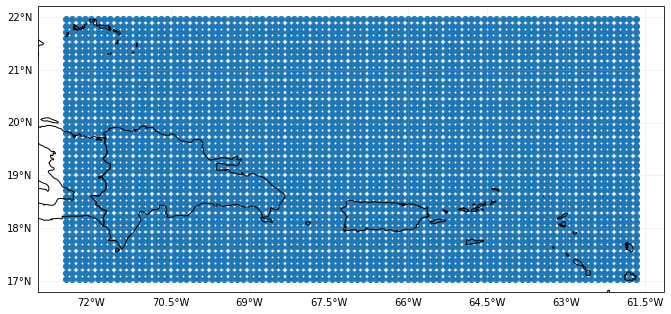

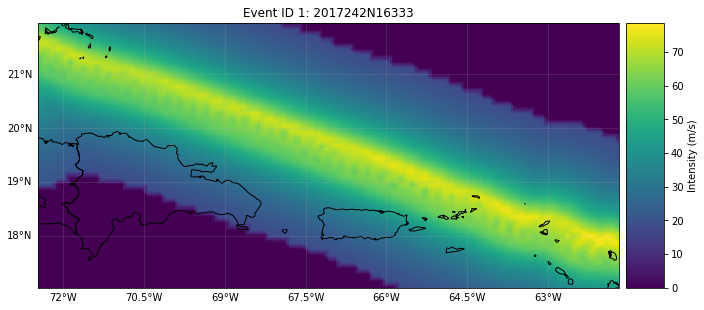

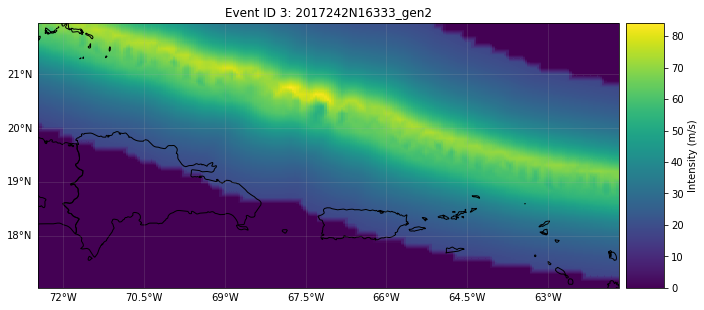

In [8]:
from climada.hazard import Centroids, TropCyclone

# construct centroids
min_lat, max_lat, min_lon, max_lon = 16.99375, 21.95625, -72.48125, -61.66875
cent = Centroids()
cent.set_raster_from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.12)
cent.check()
cent.plot()

# construct tropical cyclones
tc_irma = TropCyclone()
tc_irma.set_from_tracks(tr_irma, centroids=cent)
#tc_irma.set_from_tracks(tr_irma) # try without given centroids
tc_irma.check()
tc_irma.plot_intensity('2017242N16333')      # IRMA
tc_irma.plot_intensity('2017242N16333_gen2') # IRMA's synthetic track 2

<a id='Part2.b'></a> 
## b) Implementing climate change

`set_climate_scenario_knu` implements the changes on intensity and frequency due to climate change described in *Global projections of intense tropical cyclone activity for the late twenty-first century from dynamical downscaling of CMIP5/RCP4.5 scenarios* of Knutson et al 2015. Other RCP scenarios are approximated from the RCP 4.5 values by interpolating them according to their relative radiative forcing.

2020-10-22 11:01:45,101 - climada.hazard.trop_cyclone - INFO - Mapping 6 tracks to 3822 centroids.
2020-10-22 11:01:45,613 - climada.hazard.trop_cyclone - INFO - Progress: 16%
2020-10-22 11:01:46,040 - climada.hazard.trop_cyclone - INFO - Progress: 33%
2020-10-22 11:01:46,476 - climada.hazard.trop_cyclone - INFO - Progress: 50%
2020-10-22 11:01:46,908 - climada.hazard.trop_cyclone - INFO - Progress: 66%
2020-10-22 11:01:47,312 - climada.hazard.trop_cyclone - INFO - Progress: 83%


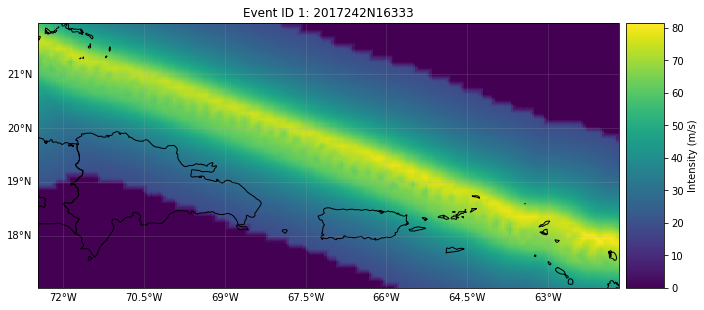

In [9]:
# an Irma event-like in 2055 under RCP 4.5:
tc_irma = TropCyclone()
tc_irma.set_from_tracks(tr_irma, centroids=cent)
tc_irma_cc = tc_irma.set_climate_scenario_knu(ref_year=2055, rcp_scenario=45)
tc_irma_cc.plot_intensity('2017242N16333')

**Note:** this method to implement climate change is simplified and does only take into account changes in TC frequency and intensity. However, how hurricane damage changes with climate remains challenging to assess. Records of hurricane damage exhibit widely fluctuating values because they depend on rare, landfalling events which are substantially more volatile than the underlying basin-wide TC characteristics. For more accurate future projections of how a warming climate might shape TC characteristics, there is a two-step process needed. First, the understanding of how climate change affects critical environmental factors (like SST, humidity, etc.) that shape TCs is required. Second, the means of simulating how these changes impact TC characteristics (such as intensity, frequency, etc.) are necessary. Statistical-dynamical models (Emanuel et al., 2006 and Lee et al., 2018) are physics-based and allow for such climate change studies. However, this goes beyond the scope of this tutorial.

<a id='Part2.c'></a> 
## c) Multiprocessing - improving performance for big computations

Multiprocessing is implemented in the tropical cyclones. When dealing with a big amount of data, you might consider using it as follows:

**Warning**: execute these lines in a console, outside Jupyter Notebook

In [10]:
from climada.hazard import TCTracks, Centroids, TropCyclone
from pathos.pools import ProcessPool as Pool

pool = Pool() # start a pathos pool

tc_track = TCTracks(pool)  # provide the pool in the constructor   
tc_track.read_ibtracs_netcdf(provider='usa', year_range=(1992, 1994), basin='EP')
tc_track.calc_random_walk()
tc_track.equal_timestep()

lon_min, lat_min, lon_max, lat_max = -160, 10, -100, 36
centr = Centroids()
centr.set_raster_from_pnt_bounds((lon_min, lat_min, lon_max, lat_max), 0.1)

tc_haz = TropCyclone(pool) # provide the pool in the constructor   
tc_haz.set_from_tracks(tc_track, centr)
tc_haz.check()

pool.close()
pool.join()

2020-10-22 11:19:39,390 - climada.hazard.tc_tracks - WARNING - No valid wind/pressure values found for 1992027N05206, 1992088N05188, 1992169N14246, 1992172N07144, 1992212N05154, 1992216N06182, 1992223N15236, 1992227N13130, 1992229N24162, 1992248N19166, 1992263N05175, 1992268N11193, 1992298N10188, 1992318N06182, 1992318N11160, 1992327N11206, 1993178N14265, 1993221N12216, 1993223N07185, 1993246N16129, 1993263N11168, 1993271N14134, 1993285N12192, 1993285N16239, 1994128N04155, 1994212N11240, 1994221N15215, 1994224N16240, 1994249N11200, 1994272N40159, 1994273N08176, 1994291N12170, 1994294N13203, 1994295N25188, 1994348N04175.
2020-10-22 11:19:39,548 - climada.hazard.tc_tracks - INFO - Progress: 10%
2020-10-22 11:19:39,688 - climada.hazard.tc_tracks - INFO - Progress: 20%
2020-10-22 11:19:39,821 - climada.hazard.tc_tracks - INFO - Progress: 30%
2020-10-22 11:19:39,965 - climada.hazard.tc_tracks - INFO - Progress: 40%
2020-10-22 11:19:40,106 - climada.hazard.tc_tracks - INFO - Progress: 50%
20

Process ForkPoolWorker-2:
Traceback (most recent call last):
  File "/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/multiprocess/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/multiprocess/pool.py", line 110, in worker
    task = get()
  File "/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/multiprocess/queues.py", line 355, in get
    res = self._reader.recv_bytes()
  File "/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/multiprocess/connection.py", line 219, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/multiprocess/connection.py", line 4

  File "/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/pickle.py", line 662, in save_reduce
    save(state)
  File "<__array_function__ internals>", line 6, in einsum
  File "/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/pickle.py", line 504, in save
    f(self, obj) # Call unbound method with explicit self
  File "/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/numpy/core/einsumfunc.py", line 1356, in einsum
    return c_einsum(*operands, **kwargs)
  File "/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/dill/_dill.py", line 933, in save_module_dict
    StockPickler.save_dict(pickler, obj)
KeyboardInterrupt
  File "/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/pickle.py", line 859, in save_dict
    self._batch_setitems(obj.items())
  File "/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/pickle.py", line 885, in _batch_setitems
    save(v)
  File "/Users

  File "/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/multiprocess/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/pathos/helpers/mp_helper.py", line 15, in <lambda>
    func = lambda args: f(*args)
  File "/Users/simonameiler/Documents/WCR/CLIMADA_develop/climada_python/climada/hazard/trop_cyclone.py", line 310, in _tc_from_track
    windfields = compute_windfields(track, coastal_centr, mod_id)
  File "/Users/simonameiler/Documents/WCR/CLIMADA_develop/climada_python/climada/hazard/trop_cyclone.py", line 414, in compute_windfields
    log=True, method="geosphere")]
  File "/Users/simonameiler/Documents/WCR/CLIMADA_develop/climada_python/climada/util/coordinates.py", line 256, in dist_approx
    vtan = np.einsum('nkli,nkji->nklj', vtan, vbasis)
  File "<__array_function__ internals>", line 6, in einsum
  File "/Users/simonameiler/opt/anaconda3/envs/climada_en

KeyboardInterrupt: 

Process ForkPoolWorker-10:
Process ForkPoolWorker-12:
Process ForkPoolWorker-9:
Process ForkPoolWorker-14:
Process ForkPoolWorker-11:
Process ForkPoolWorker-13:
Process ForkPoolWorker-15:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):


<a id='Part2.d'></a> 
## d) Making videos
Videos of a tropical cyclone hitting specific centroids are done automatically using the method `video_intensity()`.

**Warning**: execute these lines in a console, outside Jupyter Notebook

In [12]:
lon_min, lat_min, lon_max, lat_max = -83.5, 24.4, -79.8, 29.6
centr_video = Centroids()
centr_video.set_raster_from_pnt_bounds((lon_min, lat_min, lon_max, lat_max), 0.04)
centr_video.check()

track_name = '2017242N16333' # '2016273N13300' # '1992230N11325'
tc_video = TropCyclone()
# use file_name='' to not to write the video
tc_list, tr_coord = tc_video.video_intensity(track_name, tr_irma, centr_video, file_name='./results/irma_tc_fl.gif')
# tc_list contains a list with TropCyclone instances plotted at each time step
# tr_coord contains a list with the track path coordinates plotted at each time step

# mp4 occupies much less space! To use it:
# conda install ffmpeg
# in code:
# plt.rcParams['animation.ffmpeg_path']='path/to/climada_env/bin/ffmpeg'
# writer=animation.FFMpegWriter(bitrate=500)
# tc_list, tr_coord = tc_video.video_intensity(track_name, tr_irma, centr_video, file_name='./results/irma_tc_fl.gif', writer=writer)

2020-10-22 11:34:14,442 - climada.hazard.centroids.centr - INFO - Convert centroids to GeoSeries of Point shapes.
2020-10-22 11:34:18,310 - climada.util.coordinates - INFO - dist_to_coast: UTM 32617 (1/1)
2020-10-22 11:34:25,677 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 12314 centroids.
2020-10-22 11:34:25,712 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 12314 centroids.
2020-10-22 11:34:25,736 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 12314 centroids.
2020-10-22 11:34:25,785 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 12314 centroids.
2020-10-22 11:34:25,810 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 12314 centroids.
2020-10-22 11:34:25,835 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 12314 centroids.
2020-10-22 11:34:25,860 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 12314 centroids.
2020-10-22 11:34:25,917 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 12314 centro


  0%|          | 0/39 [00:00<?, ?it/s]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

  3%|▎         | 1/39 [00:01<00:50,  1.32s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

  5%|▌         | 2/39 [00:03<00:58,  1.57s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

  8%|▊         | 3/39 [00:06<01:12,  2.01s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

 10%|█         | 4/39 [00:09<01:18,  2.24s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

 13%|█▎        | 5/39 [00:12<01:25,  2.52s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

 15%|█▌        | 6/39 [00:15<01:31,  2.76s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

 18%|█▊        | 7/39 [00:19<01:42,  3.19s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 9-10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 9-10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 9-10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 9-10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

 21%|██        | 8/39 [00:24<01:53,  3.67s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

 23%|██▎       | 9/39 [00:29<02:00,  4.02s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

 26%|██▌       | 10/39 [00:34<02:05,  4.32s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

 28%|██▊       | 11/39 [00:41<02:18,  4.94s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 15: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 15: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 16: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 16: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

 31%|███       | 12/39 [00:47<02:24,  5.34s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

 33%|███▎      | 13/39 [00:54<02:32,  5.87s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

 36%|███▌      | 14/39 [01:01<02:37,  6.29s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 9-10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 9-10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

 38%|███▊      | 15/39 [01:08<02:35,  6.49s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 9-10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 9-10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc6 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc6 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 9-10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 9-10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

 41%|████      | 16/39 [01:16<02:38,  6.90s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

 44%|████▎     | 17/39 [01:25<02:42,  7.39s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 12: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 12: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

 46%|████▌     | 18/39 [01:33<02:44,  7.84s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

 49%|████▊     | 19/39 [01:42<02:40,  8.05s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

 51%|█████▏    | 20/39 [01:52<02:44,  8.67s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

 54%|█████▍    | 21/39 [02:02<02:43,  9.10s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

 56%|█████▋    | 22/39 [02:13<02:41,  9.50s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

 59%|█████▉    | 23/39 [02:24<02:39,  9.96s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

 62%|██████▏   | 24/39 [02:35<02:35, 10.36s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

 64%|██████▍   | 25/39 [02:47<02:30, 10.76s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

 67%|██████▋   | 26/39 [02:59<02:26, 11.30s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

 69%|██████▉   | 27/39 [03:13<02:24, 12.07s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

 72%|███████▏  | 28/39 [03:28<02:21, 12.89s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 9-10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 9-10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

 74%|███████▍  | 29/39 [03:41<02:09, 12.97s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

 77%|███████▋  | 30/39 [03:55<02:00, 13.33s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

 79%|███████▉  | 31/39 [04:10<01:49, 13.64s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 9-10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 9-10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

 82%|████████▏ | 32/39 [04:24<01:38, 14.03s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

 85%|████████▍ | 33/39 [04:40<01:27, 14.51s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 10-11: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 8-9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

 87%|████████▋ | 34/39 [04:57<01:15, 15.12s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

 90%|████████▉ | 35/39 [05:14<01:03, 15.82s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 12: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 12: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

 92%|█████████▏| 36/39 [05:32<00:49, 16.44s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

 95%|█████████▍| 37/39 [05:49<00:33, 16.60s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

 97%|█████████▋| 38/39 [06:07<00:17, 17.06s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

100%|██████████| 39/39 [06:24<00:00, 17.07s/it]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xeb in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 13: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 13: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xab in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd9 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd8 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 17: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 17: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 9: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa9 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb6 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 7: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 10: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 10: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8d in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7-8: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 7: invalid start byte


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 13-14: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 7: invalid start byte

40it [06:46, 18.46s/it]                        

### REFERENCES:

- Bloemendaal, N., Haigh, I. D., de Moel, H., Muis, S., Haarsma, R. J., & Aerts, J. C. J. H. (2020). Generation of a global synthetic tropical cyclone hazard dataset using STORM. Scientific Data, 7(1). https://doi.org/10.1038/s41597-020-0381-2

- Emanuel, K., S. Ravela, E. Vivant, and C. Risi, 2006: A Statistical Deterministic Approach to Hurricane Risk Assessment. Bull. Amer. Meteor. Soc., 87, 299–314, https://doi.org/10.1175/BAMS-87-3-299.

- Geiger, T., Frieler, K., & Levermann, A. (2016). High-income does not protect against hurricane losses. Environmental Research Letters, 11(8). https://doi.org/10.1088/1748-9326/11/8/084012

- Knutson, T. R., Sirutis, J. J., Zhao, M., Tuleya, R. E., Bender, M., Vecchi, G. A., … Chavas, D. (2015). Global projections of intense tropical cyclone activity for the late twenty-first century from dynamical downscaling of CMIP5/RCP4.5 scenarios. Journal of Climate, 28(18), 7203–7224. https://doi.org/10.1175/JCLI-D-15-0129.1

- Lee, C. Y., Tippett, M. K., Sobel, A. H., & Camargo, S. J. (2018). An environmentally forced tropical cyclone hazard model. Journal of Advances in Modeling Earth Systems, 10(1), 223–241. https://doi.org/10.1002/2017MS001186